In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [77]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#Data Preprocessing

In [78]:
data.shape

(7920, 3)

In [79]:
data.duplicated().sum()

np.int64(0)

In [80]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#Text Preprocessing

In [81]:
import re
import string

In [82]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [83]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join (x.lower() for x in x.split()))

In [84]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#Remove Links

In [85]:
data["tweet"] = data["tweet"].apply(
   lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags = re.MULTILINE) for x in x.split()))


In [86]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


#Remove Punctuation

In [87]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
def remove_punctuations(text) :
    for punctuation in string.punctuation:
        text = text.replace (punctuation, "  ")
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [94]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie s...
7916,7917,0,we would like to wish you an amazing day mak...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay co...
7919,7920,0,apple barcelona apple store bcn ...


#Remove numbers

In [102]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [103]:
data["tweet"].tail(5)

7915    live out lou   lol   liveoutlou   selfie   smi...
7916    we woul like to wish you an amazing ay   make ...
7917    helping my lovely  year ol neighbor with her i...
7918    finally got my   smart   pocket   wifi stay co...
7919    apple barcelona         apple   store   bcn   ...
Name: tweet, dtype: object

#Remove Stop Words

In [104]:
pip install nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 882.6 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 882.6 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 905.5 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 867.1 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 867.1 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 883.7 kB/s  0:00:01
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 

In [105]:
import nltk

In [109]:
nltk.download("stopwords",download_dir = "../Static/model")

[nltk_data] Downloading package stopwords to ../Static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [110]:
with open ("../Static/model/corpora/stopwords/english","r") as file:
    sw = file.read().splitlines()

In [111]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [112]:
data["tweet"] = data["tweet"].apply(
    lambda x : " ".join (x for x in x.split() if x not in sw))

In [113]:
data["tweet"].head(5)

0    fingerprint pregnancy test anroi apps beautifu...
1    finally transparant silicon case thanks uncle ...
2    love woul go talk makememories unplug relax ip...
3    wire know george mae way iphone cute aventry home
4    amazing service apple even talk question unles...
Name: tweet, dtype: object

#Stemming

In [115]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [116]:
data["tweet"] = data["tweet"].apply(
    lambda x : " ".join (ps.stem(x) for x in x.split()))

In [117]:
data["tweet"].head()

0    fingerprint pregnanc test anroi app beauti cut...
1    final transpar silicon case thank uncl yay son...
2    love woul go talk makememori unplug relax ipho...
3      wire know georg mae way iphon cute aventri home
4    amaz servic appl even talk question unless pay...
Name: tweet, dtype: object

In [118]:
ps

<PorterStemmer>

#Building Vacabulary

In [119]:
from collections import Counter

In [120]:
vocab = Counter()

In [121]:
for sentence in data["tweet"] :
    vocab.update(sentence.split())

In [122]:
tokens = [key for key in vocab if vocab[key] > 10]

In [126]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding = 'utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../Static/model/vocabulary.txt')

#Divide Data Set

In [128]:
x = data["tweet"]
y = data["label"]

In [129]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.7 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.7 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.7 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 1.7 MB/s eta 0:00:04
   ------------- -------------------------- 2.9/8.7 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 2.0 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.0 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.7 MB 1.9 MB/s eta 0:00:03
   ---------------------- -------

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#Vectorization

In [136]:
def vectorizer(ds,vocabulary) :
    vectorized_list = []
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)) :
            if vocabulary [i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list,dtype = np.float32)
    return vectorized_list_new

In [137]:
vectorized_x_train = vectorizer(x_train,tokens)

In [138]:
vectorized_x_test = vectorizer(x_test,tokens)

In [139]:
y_train.value_counts()

label
0    4744
1    1592
Name: count, dtype: int64

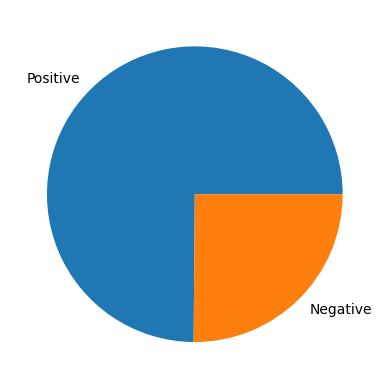

In [140]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels = ["Positive","Negative"])
plt.show()

#Handle Imbalanced Data Set

In [141]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9488, 1168) (9488,)


In [143]:
y_train_smote.value_counts()

label
0    4744
1    4744
Name: count, dtype: int64

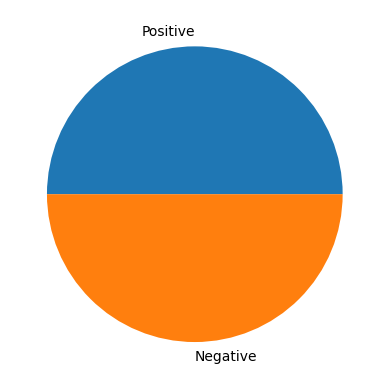

In [144]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels = ["Positive","Negative"])
plt.show()

#Model Training & Evaluation

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [148]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
def training_scores(y_act,y_pred) :
    acc = round(accuracy_score(y_act,y_pred) , 3)
    pr = round(precision_score(y_act,y_pred) , 3)
    rec = round(recall_score(y_act,y_pred) , 3)
    f1 = round(f1_score(y_act,y_pred) , 3)
    print(f'Training Scores : \n\t Accuracy = {acc} \n \t Precision = {pr} \n\t Recall = {rec} \n\t F1_score = {f1}')

def validation_scores(y_act , y_pred) :
    acc = round(accuracy_score(y_act,y_pred) , 3)
    pr = round(precision_score(y_act,y_pred) , 3)
    rec = round(recall_score(y_act,y_pred) , 3)
    f1 = round(f1_score(y_act,y_pred) , 3)
    print(f'Training Scores : \n\t Accuracy = {acc} \n \t Precision = {pr} \n\t Recall = {rec} \n\t F1_score = {f1}')

#Logistic Regression


In [149]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores : 
	 Accuracy = 0.943 
 	 Precision = 0.919 
	 Recall = 0.971 
	 F1_score = 0.945
Training Scores : 
	 Accuracy = 0.859 
 	 Precision = 0.713 
	 Recall = 0.811 
	 F1_score = 0.759


#Naive Bays


In [150]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores : 
	 Accuracy = 0.911 
 	 Precision = 0.875 
	 Recall = 0.959 
	 F1_score = 0.915
Training Scores : 
	 Accuracy = 0.859 
 	 Precision = 0.68 
	 Recall = 0.912 
	 F1_score = 0.78


#Decision Tree

In [151]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = dt.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores : 
	 Accuracy = 1.0 
 	 Precision = 1.0 
	 Recall = 0.999 
	 F1_score = 1.0
Training Scores : 
	 Accuracy = 0.823 
 	 Precision = 0.701 
	 Recall = 0.62 
	 F1_score = 0.658


#Random Forest


In [152]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores : 
	 Accuracy = 1.0 
 	 Precision = 1.0 
	 Recall = 1.0 
	 F1_score = 1.0
Training Scores : 
	 Accuracy = 0.868 
 	 Precision = 0.788 
	 Recall = 0.71 
	 F1_score = 0.747


#Support Vector Machine

In [153]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = svm.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores : 
	 Accuracy = 0.978 
 	 Precision = 0.962 
	 Recall = 0.996 
	 F1_score = 0.979
Training Scores : 
	 Accuracy = 0.869 
 	 Precision = 0.745 
	 Recall = 0.793 
	 F1_score = 0.768


In [154]:
import pickle
with open ('../Static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)
